Tokens: ['The', 'cat', 'sat', 'on', 'the', 'mat']


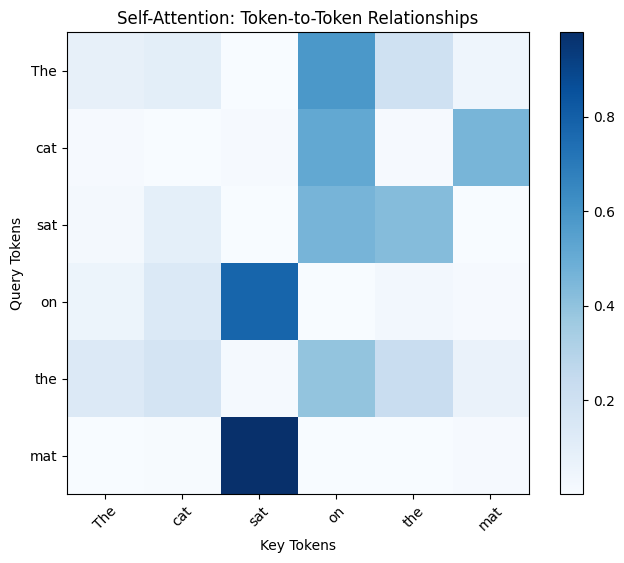

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Input sentence
sentence = "The cat sat on the mat"
tokens = sentence.split()  # Tokenize the sentence
print("Tokens:", tokens)

# Step 1: Represent tokens as embeddings (random for simplicity)
embedding_dim = 4  # Embedding size
num_tokens = len(tokens)
embeddings = torch.randn(num_tokens, embedding_dim)  # Random embeddings

# Step 2: Create Query (Q), Key (K), and Value (V) matrices
W_q = torch.randn(embedding_dim, embedding_dim)  # Query weight
W_k = torch.randn(embedding_dim, embedding_dim)  # Key weight
W_v = torch.randn(embedding_dim, embedding_dim)  # Value weight

Q = embeddings @ W_q  # Query matrix
K = embeddings @ W_k  # Key matrix
V = embeddings @ W_v  # Value matrix

# Step 3: Compute attention scores
d_k = K.size(-1)  # Dimension of key
attention_scores = Q @ K.T / np.sqrt(d_k)  # Scaled dot product
attention_weights = F.softmax(attention_scores, dim=-1)  # Apply softmax

# Step 4: Compute the weighted sum of values
output = attention_weights @ V

# Visualization
plt.figure(figsize=(8, 6))
plt.imshow(attention_weights.detach().numpy(), cmap='Blues')
plt.colorbar()
plt.xticks(ticks=np.arange(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=np.arange(len(tokens)), labels=tokens)
plt.title("Self-Attention: Token-to-Token Relationships")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()


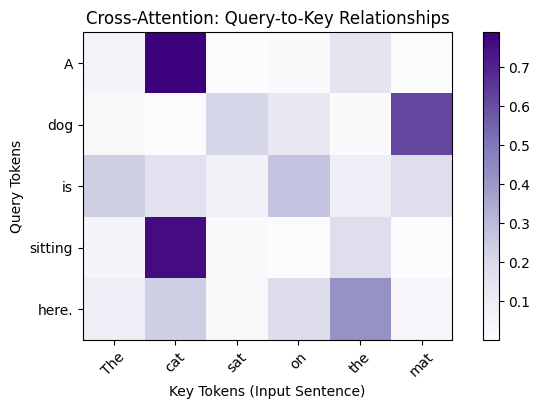

In [2]:
# Query sentence
query_sentence = "A dog is sitting here."
query_tokens = query_sentence.split()  # Tokenize the query
query_embeddings = torch.randn(len(query_tokens), embedding_dim)  # Random embeddings

# Step 1: Create Q, K, V matrices
Q = query_embeddings @ W_q  # Query comes from the query sentence
K = embeddings @ W_k        # Key comes from the input sentence
V = embeddings @ W_v        # Value comes from the input sentence

# Step 2: Compute attention scores and weights
attention_scores = Q @ K.T / np.sqrt(d_k)  # Cross-attention
attention_weights = F.softmax(attention_scores, dim=-1)

# Step 3: Compute the weighted sum of values
output = attention_weights @ V

# Visualization
plt.figure(figsize=(8, 4))
plt.imshow(attention_weights.detach().numpy(), cmap='Purples')
plt.colorbar()
plt.xticks(ticks=np.arange(len(tokens)), labels=tokens, rotation=45)
plt.yticks(ticks=np.arange(len(query_tokens)), labels=query_tokens)
plt.title("Cross-Attention: Query-to-Key Relationships")
plt.xlabel("Key Tokens (Input Sentence)")
plt.ylabel("Query Tokens")
plt.show()


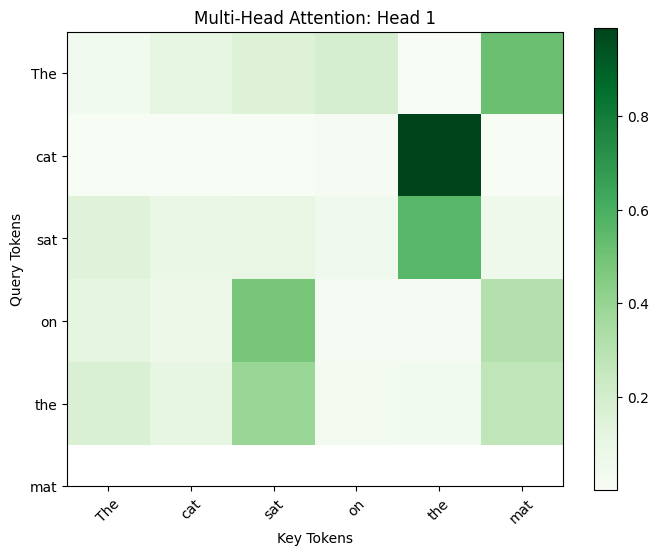

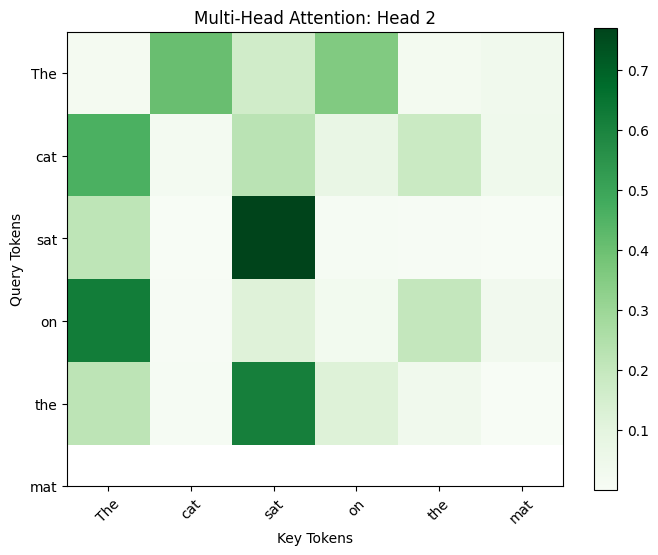

In [3]:
# Multi-Head Attention Parameters
num_heads = 2  # Number of attention heads
head_dim = embedding_dim // num_heads  # Dimension per head

# Splitting embeddings into multiple heads
Q = Q.view(num_heads, -1, head_dim)
K = K.view(num_heads, -1, head_dim)
V = V.view(num_heads, -1, head_dim)

# Compute attention scores for each head
attention_scores = Q @ K.transpose(-2, -1) / np.sqrt(head_dim)  # Per-head scaled dot product
attention_weights = F.softmax(attention_scores, dim=-1)

# Compute weighted values per head
head_outputs = attention_weights @ V

# Visualization for each head
for i in range(num_heads):
    plt.figure(figsize=(8, 6))
    plt.imshow(attention_weights[i].detach().numpy(), cmap='Greens')
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(tokens)), labels=tokens, rotation=45)
    plt.yticks(ticks=np.arange(len(tokens)), labels=tokens)
    plt.title(f"Multi-Head Attention: Head {i+1}")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.show()

# Concatenate heads and project back to original dimension
head_outputs = head_outputs.view(-1, embedding_dim)  # Combine heads
final_output = head_outputs @ torch.randn(embedding_dim, embedding_dim)  # Output projection
